<a href="https://colab.research.google.com/github/saitarun18/StatisticsForCS/blob/main/CaseStudyStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study, Group 10


Importing our dataset: Performance enhancers

In [ ]:
import scipy.stats
import pandas as pd
import numpy as np
import math
import statistics

In [ ]:
df = pd.read_excel('/content/CaseStudyStats.xlsx')
print(df)

    Sr. No.  Sports Gender Marital Status  Weight before  Weight after
0         1       6      M         Single             62            60
1         2       6      F        Married             78            80
2         3       8      F        Married             64            68
3         4      11      M         Single             73            76
4         5      11      M        Married             75            67
..      ...     ...    ...            ...            ...           ...
95       96       5      F        Married             65            61
96       97       8      F        Married             64            69
97       98       8      M         Single             73            76
98       99      11      M         Single             65            68
99      100       5      F        Married             79            72

[100 rows x 6 columns]


# **Unit 2**

In [ ]:
population = df['Sports'].to_numpy()
mean = population.mean()

z-test for one sample, mean

In [ ]:
print('H0: Average number of sports that a person plays equal to 8.')
print('H1: Average number of sports that a person plays is not equal to 8.')
alpha = 0.05 #Taking alpha as 5%
sample_size = 50
sample = df['Sports'].sample(sample_size)
sample_mean = np.mean(sample)
sample_SD = np.std(sample)
n = np.shape(sample)[0]
Z_calc = abs(sample_mean - mean)/(sample_SD/(np.sqrt(n-1)))
Z_tab = scipy.stats.norm.ppf(1-alpha)
print(f"Z_calc = {Z_calc} and Z_tab = {Z_tab}")

if Z_calc <= Z_tab:
    print("Null hypothesis is accepted")
else:
    print("Null hypothesis is rejected")

print(f"Confidence interval for {alpha}")
standard_error = (sample_SD/(np.sqrt(n-1)))*(Z_tab)

lower_limit = sample_mean - standard_error
upper_limit = sample_mean + standard_error
print(f"{lower_limit} <= mean <= {upper_limit}")



H0: Average number of sports that a person plays equal to 8.
H1: Average number of sports that a person plays is not equal to 8.
Z_calc = 1.340648305610111 and Z_tab = 1.6448536269514722
Null hypothesis is accepted
Confidence interval for 0.05
6.980661804114491 <= mean <= 8.37933819588551


z-test for two samples, mean

In [ ]:
print('H0 : There is no difference between the means of the populations.')
print('H1 : There is difference between the means of the populations.')
alpha = 0.10
n_1 = 35
n_2 = 40
sample_1 = df['Sports'].sample(n_1)
print(sample_1)
sample_2 = df['Sports'].sample(n_2)
print(sample_2)
sample_1_mean = np.mean(sample_1)
sample_2_mean = np.mean(sample_2)
SD_1 = np.std(sample_1)
SD_2 = np.std(sample_2)
Z_cal = abs(sample_1_mean-sample_2_mean)/np.sqrt((SD_1)**2/n_1 + (SD_2)**2/n_2)
Z_tab = scipy.stats.norm.ppf(1-alpha)
print(f"Z_cal = {Z_cal} and Z_tab = {Z_tab}")
if Z_cal <= Z_tab:
    print("Null hypothesis accepted")
else:
    print("Null hypothesis is rejected")

print(f"The confidence interval is given by: ")
margin_error = (np.sqrt((SD_1)**2/n_1 + (SD_2)**2/n_2))*Z_tab
estimated_diff = (abs(sample_1_mean-sample_2_mean))

lower_limit = estimated_diff - margin_error
upper_limit = estimated_diff + margin_error
print(f"{lower_limit} <= difference_mean <= {upper_limit}")

H0 : There is no difference between the means of the populations.
H1 : There is difference between the means of the populations.
86     8
96     8
19     6
13     7
59     6
62     5
92     7
95     5
37     6
58     5
48     8
87    10
15    18
75     8
66    18
25     5
41     5
79     7
14    12
49     9
38    15
34    18
12     8
31    10
43    16
57     9
72    11
36     6
67     9
71    10
63     9
56     8
82     7
26     6
89     7
Name: Sports, dtype: int64
87    10
77     5
95     5
63     9
45     5
19     6
85     6
25     5
44    10
42     5
80     6
6     15
73     7
69    13
0      6
76     8
53     5
13     7
15    18
32     9
52     9
88     7
7     11
8      6
74     5
48     8
75     8
46     5
90    14
36     6
26     6
65     6
81    11
39     6
2      8
91    10
61     6
86     8
58     5
92     7
Name: Sports, dtype: int64
Z_cal = 1.4006793238413946 and Z_tab = 1.2815515655446004
Null hypothesis is rejected
The confidence interval is given by: 
0.0947699855245598

z-test for one sample, proportion

In [ ]:
print('H0: 55% of all sportsmen are married')
print('H1: 55% of all sportsmen are not married')
alpha = 0.05 #Taking alpha as 5%
pb=0.55 #estimated proprtion = 55%
sample_size = 80
sample = df['Marital Status'].sample(sample_size)
n = np.shape(sample)[0]
count=0
for x in sample:
  if x=='Married':
    count+=1
p=(count/sample_size)
print("Calculated proportion from sample: ",p)
Z_calc = abs(p-pb)/np.sqrt((p*(1-p))/n)
Z_tab = scipy.stats.norm.ppf(1-alpha)
print(f"Z_calc = {Z_calc} and Z_tab = {Z_tab}")

if Z_calc <= Z_tab:
    print("H0 is accepted. There is not enough evidence to reject the claim.")
else:
    print("H0 is rejected. There is enough evidence to reject the claim.")

print(f"Confidence interval for {alpha} level of significance: ")
standard_error = (np.sqrt((p*(1-p))/n))*(Z_tab)

lower_limit = p - standard_error
upper_limit = p + standard_error 
print(f"{lower_limit} <= proportion <= {upper_limit}")

H0: 55% of all sportsmen are married
H1: 55% of all sportsmen are not married
Calculated proportion from sample:  0.5
Z_calc = 0.8944271909999167 and Z_tab = 1.6448536269514722
H0 is accepted. There is not enough evidence to reject the claim.
Confidence interval for 0.05 level of significance: 
0.40804988692748567 <= proportion <= 0.5919501130725143


z-test for two samples, proportion

In [ ]:
print('H0: There is no significant difference between the proportions of married male and female sportsmen.')
print('H1: There is a significant difference between the proportions of married male and female sportsmen.')
alpha = 0.05 #Taking alpha as 5%
sample_size = 80
sample = df[['Marital Status','Gender']].sample(sample_size).to_numpy()
Sample1,Sample2=[],[]

for x in sample:
  if x[1]=='M':
    Sample1.append(x[0])
  else:
    Sample2.append(x[0])

def calculateProportion(A):
  count=0
  for x in A:
    if x=='Married':
      count+=1
  return count,len(A)

x1,n1=calculateProportion(Sample1)
x2,n2=calculateProportion(Sample2)

p1, p2 = x1/n1, x2/n2

print("Calculated proportions from samples: ")
print(f"Proportion for male sample = {p1} and Proportion for female sample = {p2}")

p=(x1+x2)/(n1+n2)
q=1-p

Z_calc = abs(p1-p2)/np.sqrt(p*q*((1/n1)+(1/n2)))
Z_tab = scipy.stats.norm.ppf(1-alpha)
print(f"Z_calc = {Z_calc} and Z_tab = {Z_tab}")

if Z_calc <= Z_tab:
    print("H0 is accepted. There is not enough evidence to reject the claim.")
else:
    print("H0 is rejected. There is enough evidence to reject the claim.")

print(f"Confidence interval for {alpha} level of significance: ")
standard_error = (np.sqrt(p*q*((1/n1)+(1/n2))))*(Z_tab)
proportion_difference = abs(p1-p2)

lower_limit = proportion_difference - standard_error
upper_limit = proportion_difference + standard_error

print(f"{lower_limit} <= difference in proportions <= {upper_limit}")

H0: There is no significant difference between the proportions of married male and female sportsmen.
H1: There is a significant difference between the proportions of married male and female sportsmen.
Calculated proportions from samples: 
Proportion for male sample = 0.45 and Proportion for female sample = 0.575
Z_calc = 1.1183835382312346 and Z_tab = 1.6448536269514722
H0 is accepted. There is not enough evidence to reject the claim.
Confidence interval for 0.05 level of significance: 
-0.05884274834204792 <= difference in proportions <= 0.30884274834204783


t-test for one sample

In [ ]:
print('H0: Average weight of a person before taking enhancers is equal to 70.')
print('H1: Average weight of a person before taking enhancers is not equal to 70.')
sample_size = 15
population = df['Weight before'].to_numpy()
mean = population.mean()
t_sample = df['Weight before'].sample(sample_size)
alpha = 0.05
n = np.shape(t_sample)[0]
dof = n-1
sample_mean = t_sample.mean()
sample_SD = t_sample.std()
t_tab = scipy.stats.t.ppf(q=1-alpha,df=dof)
t_cal = abs(sample_mean - mean)/(sample_SD/(np.sqrt(n-1)))
 
print(f"t_cal = {t_cal} and t_tab = {t_tab}")
if t_cal <= t_tab:
    print("Accept Null hypothesis")
else:
    print("Null hypothesis rejected")

standard_error = (sample_SD/(np.sqrt(n-1)))*(t_tab)

lower_limit = sample_mean - standard_error
upper_limit = sample_mean + standard_error
print(f"{lower_limit} <= mean <= {upper_limit}")

H0: Average weight of a person before taking enhancers is equal to 70.
H1: Average weight of a person before taking enhancers is not equal to 70.
t_cal = 0.7196523615823809 and t_tab = 1.7613101357748562
Accept Null hypothesis
66.49940096633888 <= mean <= 71.10059903366111


t-test for two independent samples

In [ ]:
print('H0 : Both samples are from the same population.')
print('H1 : Both samples are from different populations.')
alpha = 0.05
n_1 = 11
n_2 = 16
dof = n_1 + n_2 - 2
sample_1 = df['Weight before'].sample(n_1)
sample_2 = df['Weight before'].sample(n_2)
sample_1_mean = np.mean(sample_1)
sample_2_mean = np.mean(sample_2)
SD1 = sample_1.std()
SD2 = sample_2.std()
t_tab = scipy.stats.t.ppf(q=1-alpha,df=dof)
t_cal = (abs(sample_1_mean-sample_2_mean))/(np.sqrt((SD1)**2/n_1 + (SD2)**2/n_2))
print(f"t_cal = {t_cal} and t_tab = {t_tab}")
if t_cal <= t_tab:
    print("Accept Null hypothesis")
else:
    print("Null hypothesis rejected")

print(f"The confidence interval is given by: ")
margin_error = (np.sqrt((SD1)**2/n_1 + (SD2)**2/n_2))*t_tab
estimated_diff = (abs(sample_1_mean-sample_2_mean))

lower_limit = estimated_diff - margin_error
upper_limit = estimated_diff + margin_error
print(f"{lower_limit} <= difference_mean <= {upper_limit}")

H0 : Both samples are from the same population.
H1 : Both samples are from different populations.
t_cal = 1.1976542300874817 and t_tab = 1.7081407612518986
Accept Null hypothesis
The confidence interval is given by: 
-1.0752838859295348 <= difference_mean <= 6.120738431384067


t-test for two dependent samples

In [ ]:
print('H0 : Weight of a person after the test is the same as the one before.')
print('H1 : Weight of a person after the test is different from the one before')
n = 12
alpha = 0.05
dof = n-1
sample = df[['Weight before','Weight after']].sample(n)
data = sample['Weight before'] - sample['Weight after']
diff = data.to_numpy()
sample_mean = diff.mean()
sample_SD = diff.std()
t_tab = scipy.stats.t.ppf(q=1-alpha,df=dof)
t_cal = abs(sample_mean - 0)/(sample_SD/(np.sqrt(n)))
print(f"t_cal = {t_cal} and t_tab = {t_tab}")
if t_cal <= t_tab:
    print("Accept Null hypothesis")
else:
    print("Null hypothesis rejected")

print(f"Confidence interval for {alpha}")
standard_error = (sample_SD/(np.sqrt(n-1)))*(t_tab)

lower_limit = sample_mean - standard_error
upper_limit = sample_mean + standard_error
print(f"{lower_limit} <= mean <= {upper_limit}")

H0 : Weight of a person after the test is the same as the one before.
H1 : Weight of a person after the test is different from the one before
t_cal = 1.4911684884510747 and t_tab = 1.7958848187036691
Accept Null hypothesis
Confidence interval for 0.05
-4.139482935007114 <= mean <= 0.4728162683404469


# **Unit 3**

# Sign test for one sample                  
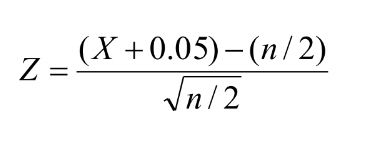

The Weights are Hypothesized that the Median is equal. A random sample of 27 member weights are yielded. At α=0.05, test the hypothesis.

In [ ]:
print('H0 : Median is equal to the hypothesized value') ### Claim
print('H1 : Median is not equal to the hypothesized value')              ### the Hypothese made

def oneSampleSignTest(data, claim) :                                      ### Function to Calculate One Sample Sign test
  sample_size = len(data)
  plus_count, minus_count = 0, 0

  for i in data:                                                          ### Loop helps to check the data 
    if i > claim:
      plus_count += 1
    elif i < claim:
      minus_count += 1

  if(sample_size < 26):
    test_value = min(plus_count, minus_count)
    return [test_value, plus_count, minus_count]
  else:
    X = min(plus_count, minus_count)
    z_calculated = ((X + 0.05) - (sample_size/2))/np.sqrt(sample_size/2)
    return [z_calculated, plus_count, minus_count]


def showResults(test_value, plus_count, minus_count, sample_size):
  n = plus_count + minus_count
  print(f"\nThe total number of plus and minus signs omit the zeros: {n}")
  print(f"Test value: {abs(test_value)}")

  if(sample_size < 26):
    
    # At 95% Confidence level and 2-tailed test the critical value is 4.

    if test_value <= 4:
      print("\nNull hypothesis is rejected.")
    else:
      print("\nNull hypothesis is accepted.")
  else:
    
    # At 95% Confidence level and 2-tailed test the critical value is 1.96.

    if abs(test_value) >= 1.96 :
      print("\nNull hypothesis is rejected.")
    else:
      print("\nNull hypothesis is accepted.")

n = 27
data = df['Weight before'].sample(n).to_numpy()

[test_value, plus_count, minus_count] = oneSampleSignTest(data, 11)
showResults(test_value, plus_count, minus_count, len(data))

H0 : Median is equal to the hypothesized value
H1 : Median is not equal to the hypothesized value

The total number of plus and minus signs omit the zeros: 27
Test value: 3.6606263378259714

Null hypothesis is rejected.


# Runs test

100 People weights are checked randomly. Test the
claim that the data is random or not,  At α=0.05, test the hypothesis.

In [1]:
print('H0 : The data is random')     ### Claim         
print('H1 : The data is not random')

def runsTest(l, l_median) :                        ### Function For Runs Test

  runs, n1, n2 = 0, 0, 0                           ### Initially all variables initialised with 0

  # Checking for start of new run
  for i in range(len(l)):

    # no. of runs
    if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
      runs += 1

    # no. of positive values
    if(l[i]) >= l_median:
      n1 += 1

    # no. of negative values
    else:
      n2 += 1

  runs_exp = ((2*n1*n2)/(n1+n2))+1
  st_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2)) / (((n1+n2)**2)*(n1+n2-1)))

  z = (runs-runs_exp)/st_dev

  return z
n = 50     ###Checking 50 members weights
data = df['Weight after'].sample(n).to_numpy()

l_median = statistics.median(data)

Z_cal = abs(runsTest(data, l_median))
print('\ntest-statistic =', Z_cal)

alpha = 0.05
Z_tab = scipy.stats.norm.ppf(1-alpha)

if abs(Z_cal) > Z_tab :
  print("\nNull hypothesis is rejected.")
else:
  print("\nNull hypothesis is accepted.")


H0 : The data is random
H1 : The data is not random


NameError: ignored

# Wilcoxon Rank Sum Test

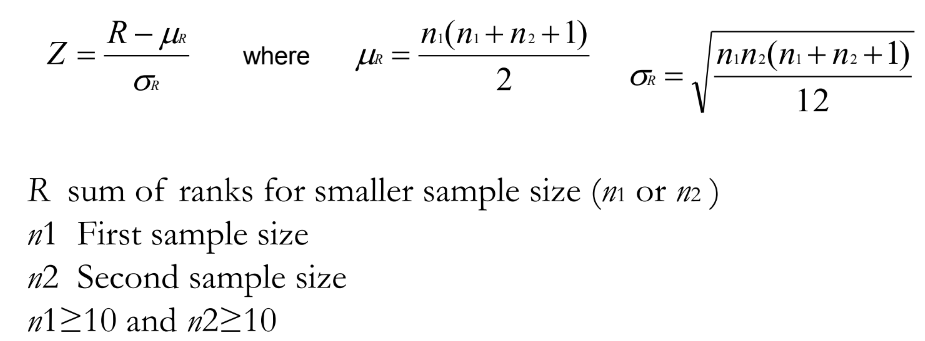

Two independent samples of Male and Female weights are taken. complete data of weight classes is recorded, At α=0.05, is there a difference in the weights of Males and females.

In [ ]:
print('H0 : There is a difference in weights for males and females')     ### Claim
print('H1 : There is no difference in weights for males and females')

from scipy import stats
alpha = 0.05
z_tab=-1.96
print("Z-tab = ", z_tab)


x = df['Weight before'].to_numpy()
y = df['Weight after'].to_numpy()

results = stats.ranksums(x, y)
z = results[0]
print("\nz_calc = ",z)
  
if( z < z_tab):
  print("\nNull hypothesis is Rejected.")
else:
  print("\nNull hypothesis is Accepted.")

H0 : There is a difference in weights for males and females
H1 : There is no difference in weights for males and females
Z-tab =  -1.96

z_calc =  -0.34573952752834375

Null hypothesis is Accepted.


# Wilcoxon Signed Rank Test
In a large Weights data, we wish to see whether the data sample selected randomly. Is there enough evidence to support the claim, at α=0.05, that there is a difference in data taken randomly or not.

In [ ]:
print("H0: The sample of Weights selected is random.")         ### Claim
print("H1: The sample of Weights selected is not random.")

from scipy import stats
alpha = 0.05
z_tab=-1.96


x = df['Weight before'].to_numpy()
y = df['Weight after'].to_numpy()

results = stats.wilcoxon(x, y)
z = results[0]
print("\nz_calc = ",z)

if( z < z_tab):
  print("\nNull hypothesis is Rejected.")
else:
  print("\nNull hypothesis is Accepted.")

H0: The sample selected is random.
H1: The sample selected is not random.

z_calc =  2409.0

Null hypothesis is Accepted.


# **Unit 4**

In [ ]:

print(df)
l1 = df.iloc[:,-1:].values
l2 = df.iloc[:, 4:5].values
f1 = df.iloc[:,1:2].values
wb = []
wa = []
sports = []
for i in range(0, len(l1)):
  wb.append(int(l1[i][0]))
  wa.append(int(l2[i][0]))
  sports.append(int(f1[i][0]))

print(wb)
print(wa)
print(sports)

    Sr. No.  Sports Gender Marital Status  Weight before  Weight after
0         1       6      M         Single             62            60
1         2       6      F        Married             78            80
2         3       8      F        Married             64            68
3         4      11      M         Single             73            76
4         5      11      M        Married             75            67
..      ...     ...    ...            ...            ...           ...
95       96       5      F        Married             65            61
96       97       8      F        Married             64            69
97       98       8      M         Single             73            76
98       99      11      M         Single             65            68
99      100       5      F        Married             79            72

[100 rows x 6 columns]
[60, 80, 68, 76, 67, 69, 66, 61, 79, 72, 61, 68, 77, 67, 74, 60, 62, 66, 69, 66, 80, 76, 79, 70, 69, 67, 64, 69, 65, 62, 74,

In [ ]:
from scipy.stats import chi2
def chi_square_test(obs, exp, alpha=0.05):
  n = len(obs)
  chi_square = 0
  for i in range(n):
    chi_square += (((obs[i] - exp[i])**2)/exp[i])
  
  cv = chi2.ppf(1-alpha, n-1)
  newline = '\n'
  print(f"alpha= {alpha}{newline}df= {n-1}{newline}Chi-Square= {round(chi_square, 4)}{newline}Critical Value= {round(cv, 3)}{newline}")
  if(chi_square > cv):
    return "The decision is to reject the null hypothesis"
  else:
    return "The decision is to accept the null hypothesis"

A researcher wished to see the number of sports/games played by a person in a street. A sample of 100 people provided the data.

In [ ]:
count1, count2, count3, count4 = 0, 0, 0, 0
for i in sports:
  if(i <= 6):
    count1 += 1
  elif(i < 9 and i > 6):
    count2 += 1
  elif(i >= 9 and i < 14):
    count3 += 1
  else:
    count4 += 1

obs = [count1, count2, count3, count4]
exp = [25, 25, 25, 25]
print("Observed: ", obs)
print("Expected: ", exp)

Observed:  [38, 26, 27, 9]
Expected:  [25, 25, 25, 25]


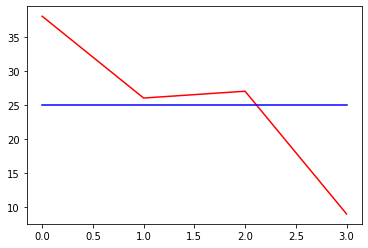

In [ ]:
import matplotlib.pyplot as plt
obs = [count1, count2, count3, count4]
exp = [25, 25, 25, 25]
plt.plot(obs,'r-')
plt.plot(exp,'b-')

In [ ]:
print("H0: There is no preference in number of sports played")
print("Ha: There is preference in number of sports played")
chi_square_test(obs, exp, 0.05)

H0: There is no preference in number of sports played
Ha: There is preference in number of sports played
alpha= 0.05
df= 3
Chi-Square= 17.2
Critical Value= 7.815



'The decision is to reject the null hypothesis'

In [ ]:
#test independence
import numpy as np
from scipy.stats import chi2

def test_independence(mx, alpha = 0.05):
  rowSum = np.sum(mx,axis=1)
  colSum = np.sum(mx,axis=0)
  n = np.sum(rowSum)

  chi_square = 0

  for i in range(len(mx)):
    for j in range(len(mx[0])):
      temp = rowSum[i]*colSum[j]/n
      chi_square += ((mx[i][j] - temp)**2/temp)

  df = (len(rowSum)-1)*(len(colSum)-1)
  cv = chi2.ppf(1-alpha, df-1)
  newline = '\n'

  print(f"Alpha= {alpha}{newline}Degrees of Freedom= {df}{newline}Chi_square= {round(chi_square, 3)}{newline}Critical Value= {round(cv, 3)}{newline}")

  if(chi_square > cv):
    return "The decision is to reject the null hypothesis"
  else:
    return "The decision is to accept the null hypothesis"

In [ ]:
df1 = df[['Gender', 'Weight after']]
m1, m2, m3, f1, f2, f3 = 0, 0, 0, 0, 0, 0
for i in df.index:
  if(df['Weight after'][i] < 65):
    if(df['Gender'][i] == 'M'):
      m1 += 1
    if(df['Gender'][i] == 'F'):
      f1 += 1
  elif(df['Weight after'][i] >= 65 and df['Weight after'][i] < 75):
    if(df['Gender'][i] == 'M'):
      m2 += 1
    if(df['Gender'][i] == 'F'):
      f2 += 1
  else:
    if(df['Gender'][i] == 'M'):
      m3 += 1
    if(df['Gender'][i] == 'F'):
      f3 += 1

obs = [m1, m2, m3]
exp = [f1, f2, f3]
print(obs, exp)

[9, 30, 11] [10, 29, 11]


A researcher wants to check if there is any relationship between weight and gender.

H0: Weight and gender of an individual is independent.
Ha: Weight and gender of an individual is dependent.

<table>
<tr>
<th>Groups</th>
<th>Thin</th>
<th>Normal</th>
<th>Fat</th>
<th>Total</th>
</tr>
<tr>
<td>Male</td>
<td>9</td>
<td>30</td>
<td>11</td>
<td>50</td>
</tr>
<tr>
<td>Female</td>
<td>10</td>
<td>29</td>
<td>11</td>
<td>50</td>
</tr>

In [ ]:
matrix = [obs, exp]
print("H0: Weight of an indvidual is independent of gender of individual")
print("Ha: Weight of an indvidual is dependent of gender of individual")
print(test_independence(matrix))

H0: Weight of an indvidual is independent of gender of individual
Ha: Weight of an indvidual is dependent of gender of individual
Alpha= 0.05
Degrees of Freedom= 3
Chi_square= 10.308
Critical Value= 5.991

The decision is to reject the null hypothesis


In [ ]:
def test_homogeneity(mx, alpha = 0.05):
  rowSum = np.sum(mx,axis=1)
  colSum = np.sum(mx,axis=0)
  n = np.sum(rowSum)

  chi_square = 0

  for i in range(len(mx)):
    for j in range(len(mx[0])):
      temp = rowSum[i]*colSum[j]/n
      chi_square += ((mx[i][j] - temp)**2/temp)

  df = (len(rowSum)-1)*(len(colSum)-1)
  cv = chi2.ppf(1-alpha, df-1)
  newline = '\n'

  print(f"Alpha= {alpha}{newline}Degrees of Freedom= {df}{newline}Chi_square= {round(chi_square, 3)}{newline}Critical Value= {round(cv, 3)}{newline}")

  if(chi_square > cv):
    return "The decision is to reject the null hypothesis"
  else:
    return "The decision is to accept the null hypothesis"

The proportion in change of weight of each sportsmen is same for male and female.

<table>
<tr>
<th>Groups</th>
<th>x<7</th>
<th>7<=x<11</th>
<th>x>=12</th>
</tr>
<tr>
<td>Yes</td>
<td>12</td>
<td>23</td>
<td>56</td>
</tr>
<tr>
<td>No</td>
<td>88</td>
<td>77</td>
<td>44</td>
</tr>


In [ ]:
print("H0: The proportion in change of weight of each sportsmen is equal")
print("Ha: The proportion in change of weight of each sportsmen is not equal")
matrix = [[12, 23, 56], [88, 77, 44]]
test_homogeneity(matrix)

H0: The proportion in change of weight of each sportsmen is equal
Ha: The proportion in change of weight of each sportsmen is not equal
Alpha= 0.05
Degrees of Freedom= 2
Chi_square= 49.624
Critical Value= 3.841



'The decision is to reject the null hypothesis'

In [ ]:
from scipy.stats import chi2
def two_contingency_test(mx, alpha = 0.05):
  a, b, c, d = mx[0][0], mx[0][1], mx[1][0], mx[1][1]
  n = a+b+c+d
  chi_square = 0
  if(a <= 5 or b <= 5 or c <= 5 or d <= 5):
    print("Yates Method")
    chi_square = n*((abs(a*d - b*c) - n/2)**2)/((a+b)*(a+c)*(b+d)*(c+d))
  else:
    chi_square = n*((a*d - b*c)**2)/((a+b)*(a+c)*(b+d)*(c+d))


  cv = chi2.ppf(1-alpha, 1)
  newline = '\n'

  print(f"alpha= {alpha}{newline}df= 1{newline}Chi-square= {round(chi_square, 3)}{newline}Critical Value= {round(cv, 3)}{newline}")

  if(chi_square > cv):
    return "The decision is to reject the null hypothesis"
  else:
    return "The decision is to accept the null hypothesis"

<table>
<th>Weight Lost</th>
<tr>
<th>Gender</th>
<th>Yes</th>
<th>No</th>
</tr>
<tr>
<td>Male</td>
<td>12</td>
<td>23</td>
</tr>
<tr>
<td>Female</td>
<td>88</td>
<td>77</td>
</tr>

In [ ]:
print("H0: There is no relationship between Gender and weight lost")
print("Ha: There is relationship between Gender and weight lost")
matrix = [[22, 28], [24, 26]]
two_contingency_test(matrix)

H0: There is no relationship between Gender and weight lost
Ha: There is relationship between Gender and weight lost
alpha= 0.05
df= 1
Chi-square= 0.161
Critical Value= 3.841



'The decision is to accept the null hypothesis'

<table>
<th>Weight Lost</th>
<tr>
<th>Gender</th>
<th>Yes</th>
<th>No</th>
</tr>
<tr>
<td>Male</td>
<td>12</td>
<td>23</td>
</tr>
<tr>
<td>Female</td>
<td>88</td>
<td>77</td>
</tr>

In [ ]:
print("H0: There is no relationship between Gender and weight lost")
print("Ha: There is relationship between Gender and weight lost")
matrix = [[4, 7], [8, 9]]
two_contingency_test(matrix, 0.05)

H0: There is no relationship between Gender and weight lost
Ha: There is relationship between Gender and weight lost
Yates Method
alpha= 0.05
df= 1
Chi-square= 0.028
Critical Value= 3.841



'The decision is to accept the null hypothesis'

# **Unit 5**

In [ ]:
level_of_significance = {'80': 1.28, '90': 1.64, '95': 1.96, '98': 2.32, '99': 2.57}
power = {'0.80': 0.842, '0.90': 1.282}

alpha = 0.01
beta = 0.20

def single_mean(alpha):
  z_tab = scipy.stats.norm.ppf(1-alpha)
  s = 2.5
  d = 0.3
  n = ((z_tab * s) / d) ** 2
  print(f"\n> Sample size for one sample single mean is {round(n)}.")


def single_proportion(alpha):
  z_tab = scipy.stats.norm.ppf(1-alpha)
  p = 0.70
  d = 0.25
  n = ((z_tab** 2) * p * (1 - p)) / (d ** 2)
  print(f"\n> Sample size for one sample single proportion is {round(n)}.")


def two_means(alpha, beta):
  za = scipy.stats.norm.ppf(1-alpha)
  zb = power[beta]
  sd = 3.5
  d = 0.4
  N = 4 * (sd ** 2) * ((za + zb) ** 2) / (d ** 2)
  print(f"\n> Sample size for two sample two means is {round(round(N) / 2)} per group.")


def two_proportions(alpha, beta):
  za = scipy.stats.norm.ppf(1-alpha)
  zb = power[beta]
  p1 = 0.65
  p2 = 0.72
  P = (p1 + p2) / 2
  d = p1 - p2
  N = 4 * (za + zb) ** 2 * (P * (1 - P)) / (d ** 2)
  print(f"\n> Sample size for two sample two proportions is {round(round(N) / 2)} per group.")


In [ ]:
single_mean(0.05)


> Sample size for one sample single mean is 188.


In [ ]:
two_means(0.10,'0.80')


> Sample size for two sample two means is 690 per group.


In [ ]:
single_proportion(0.01)


> Sample size for one sample single proportion is 18.


In [ ]:
two_proportions(0.10,'0.90')


> Sample size for two sample two proportions is 579 per group.
